# Movie Ratings Analysis: Letterboxd Dataset

In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Get the dataset
# https://drive.google.com/file/d/1XBC_ppV4Rl1-TzeVie-gWzUZAlk8dct_/view?usp=sharing
file_id = "1XBC_ppV4Rl1-TzeVie-gWzUZAlk8dct_"
url = f"https://drive.google.com/uc?id={file_id}"
output = "letterboxd_movies.csv"

gdown.download(url, output, quiet=False)

# Load the dataset
df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1XBC_ppV4Rl1-TzeVie-gWzUZAlk8dct_
To: /content/letterboxd_movies.csv
100%|██████████| 4.53M/4.53M [00:00<00:00, 137MB/s]


,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


## Data Cleaning
- Check for missing values
- Convert columns to appropriate types
- Parse genres from string to list

In [35]:
# Data cleaning functions
def parse_array(df_string):
    if not isinstance(df_string, str):
        return []
    cleaned = df_string.replace('[', '').replace(']', '').replace("'", '').replace('"', '')
    return [item.strip() for item in cleaned.split(';') if item.strip()]

def clean_dataframe(df):
    df = df.copy()
    df['Genres'] = df['Genres'].apply(parse_array)
    df['Studios'] = df['Studios'].apply(parse_array)
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
    df['Average_rating'] = pd.to_numeric(df['Average_rating'], errors='coerce')
    return df

df = clean_dataframe(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★       10000 non-null  int64  
 16  Total_ratings      1000

## Grouping and Aggregation
- By genre: count, average rating
- By year: count, average rating
- By rating: distribution

In [36]:
# Group by genre: count and average rating
def genre_stats(df):
    genre_list = []
    for _, row in df.iterrows():
        for genre in row['Genres']:
            genre_list.append({'Genre': genre, 'Average_rating': row['Average_rating']})
    genre_df = pd.DataFrame(genre_list)
    return genre_df.groupby('Genre').agg({'Average_rating': ['count', 'mean']}).sort_values(('Average_rating', 'count'), ascending=False)

genre_stats(df)

Average_rating          
                                            count      mean
Genre                                                      
Drama                                         759  3.558868
Comedy                                        362  3.081678
Horror                                        297  2.924140
Documentary                                   269  3.619306
Comedy, Drama                                 184  3.475627
...                                           ...       ...
Western, Crime                                  1  3.268535
Western, Comedy, Drama                          1  3.000000
Western, Comedy, Adventure, Action              1  3.070000
Action, Adventure, Fantasy, Drama               1  1.830000
Action, Adventure, Family                       1  3.310000

[2397 rows x 2 columns]

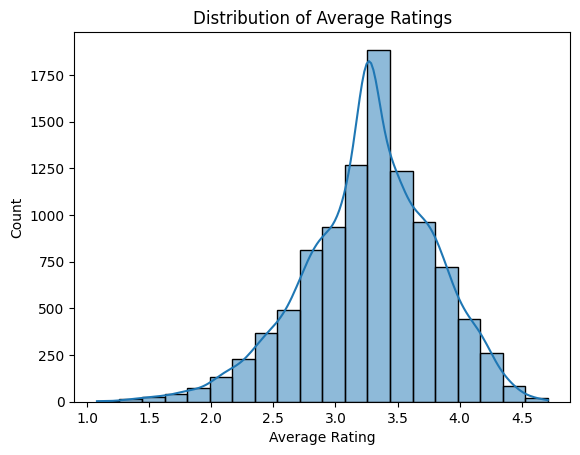

In [37]:
# Rating distribution
sns.histplot(df['Average_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

## Visualization by Genre

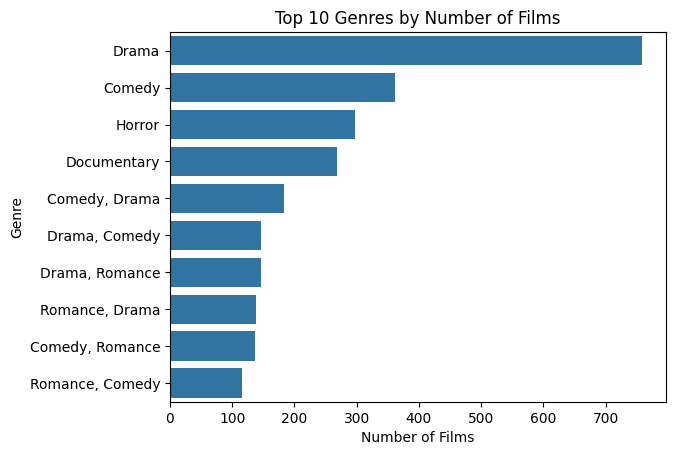

In [38]:
# Top genres by number of films
genre_df = genre_stats(df).reset_index()
sns.barplot(data=genre_df.head(10), x=('Average_rating', 'count'), y='Genre')
plt.title('Top 10 Genres by Number of Films')
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.show()

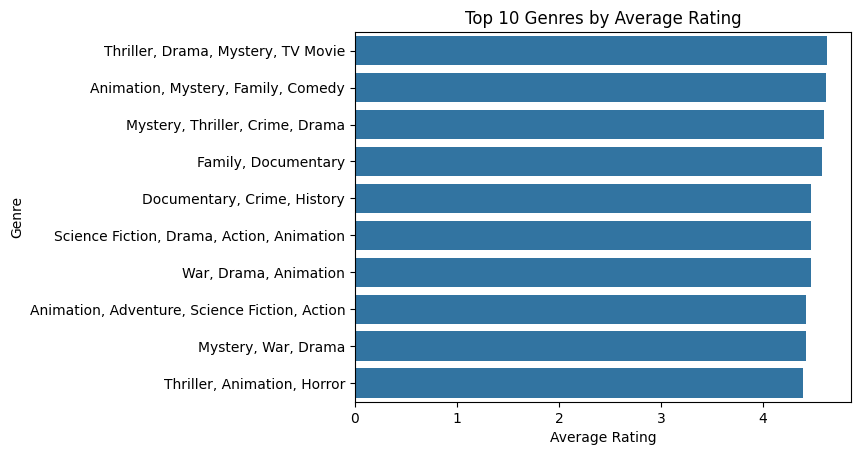

In [39]:
# Average rating by genre
sns.barplot(data=genre_df.sort_values(('Average_rating', 'mean'), ascending=False).head(10), x=('Average_rating', 'mean'), y='Genre')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

## Further Analysis
- Grouping by director, language, or studio
- Correlation between runtime and rating

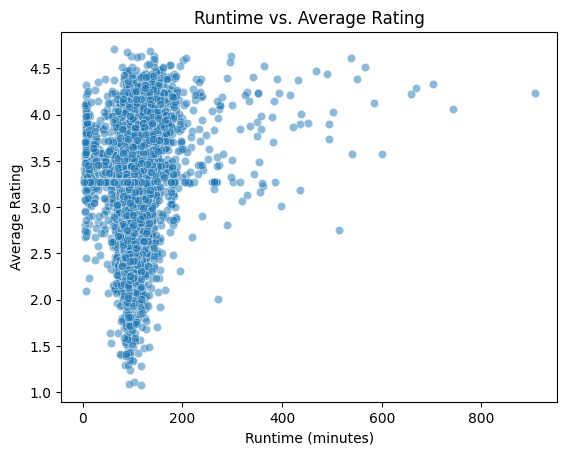

In [40]:
# Correlation between runtime and average rating
sns.scatterplot(data=df, x='Runtime', y='Average_rating', alpha=0.5)
plt.title('Runtime vs. Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

## Export to Google Sheets
Export analysis results to Google Sheets using gspread.

In [41]:
import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

spreadsheet = gc.create('Letterboxd_Analysis')
worksheet = spreadsheet.get_worksheet(0)

# This function takes a list of genres or a string and returns a string where genres are separated by a semicolon (';').
# It is useful for exporting data to Google Sheets or CSV files, where some genres may contain commas inside their names.
# Using a semicolon as a separator prevents errors during future splitting and parsing of genres.
def join_genres_with_semicolon(data_array):
    if isinstance(data_array, list):
        return ';'.join([str(g).strip() for g in data_array])
    return str(data_array)
df['Genres'] = df['Genres'].apply(join_genres_with_semicolon)
df['Studios'] = df['Studios'].apply(join_genres_with_semicolon)

set_with_dataframe(worksheet, df)

spreadsheet.url

'https://docs.google.com/spreadsheets/d/12qFLPA4N1vyGyqN7afeJnCHGJBjJfhmi0lCfqmmXemM'